# Learning goals
- Numpy
- Scipy

Based on https://github.com/jrjohansson/scientific-python-lectures

# Numpy
The numpy package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.


## Numpy arrays 
There are a number of ways to initialize new numpy arrays, for example from

- a Python list or tuples
- using functions that are dedicated to generating numpy arrays, such as arange, linspace, zeros, ones, etc.
- reading data from files

In [1]:
!pip install numpy 

In [2]:
# 1st way: numpy is a module 
from numpy import * 

Matrix = array([[1,2],[3,4]])  # from list
Matrix.shape, Matrix.size, Matrix.dtype

((2, 2), 4, dtype('int64'))

In [3]:
# 2nd way: To distinguish functions from numpy and your definitions 
import numpy as np
Matrix = np.array([[1,2],[3,4]])  # from list
Matrix.shape, Matrix.size, Matrix.dtype

((2, 2), 4, dtype('int64'))

In [4]:
from numpy import *
M = array([[1,2],[3,4]], dtype=complex)  # from list
print(M)
M.shape, M.size, M.dtype

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


((2, 2), 4, dtype('complex128'))

In [8]:
x = arange(1,5,1)  # linear mesh start:stop:increment
#print(x)
y = linspace(0,10,21) # linear mesh start,stop,number of points
#print(y)
z = logspace(-3,10,10) # log mesh, 10^start, 10^stop, number of points
print(z)

[1.00000000e-03 2.78255940e-02 7.74263683e-01 2.15443469e+01
 5.99484250e+02 1.66810054e+04 4.64158883e+05 1.29154967e+07
 3.59381366e+08 1.00000000e+10]


In [9]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [10]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
ones((3,3))*5

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [12]:
from numpy import random
#random.rand(5,5)  # uniform distributed (5x5) matrix
random.randn(5,5) # standard normal distribution random matrix

array([[-0.70877995, -1.41572612, -0.09934245, -1.05572352, -1.29090282],
       [-0.19089976, -0.79373633,  0.62472922, -0.83037079,  1.99744   ],
       [ 0.5850401 ,  1.01816831, -0.45670236, -0.38697071,  0.03672973],
       [-1.30310723,  1.07659167,  1.15681577, -2.12392853,  1.26785258],
       [-1.34122149, -0.02563395, -0.09244654, -0.51187617, -0.71523234]])

### I/O 
Very common form is comma-separated values (CSV) or tab-separated values (TSV). To read data from such files into Numpy arrays we can use the numpy.loadtxt or numpy.genfromtxt

File stockholm_td_adj.dat.txt contains Stockholm temperature over the years. The columns are [year, month, day, T_average, T_min, T_max

In [14]:
# loading .txt file from Github link "file --> View Raw --> url"
data = loadtxt('https://raw.githubusercontent.com/jrjohansson/scientific-python-lectures/master/stockholm_td_adj.dat')
data.shape

(77431, 7)

In [15]:
data[-2]

array([ 2.011e+03,  1.200e+01,  3.000e+01,  6.000e-01, -1.000e-01,
       -1.000e-01,  1.000e+00])

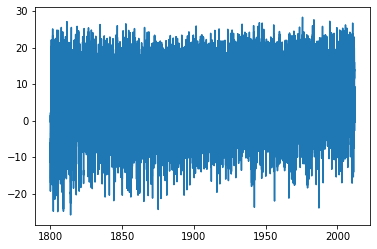

In [16]:
# inline figures from matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# time in years when we have year/month/day
t = data[:,0]+data[:,1]/12.+data[:,2]/365
plt.plot(t, data[:,3])


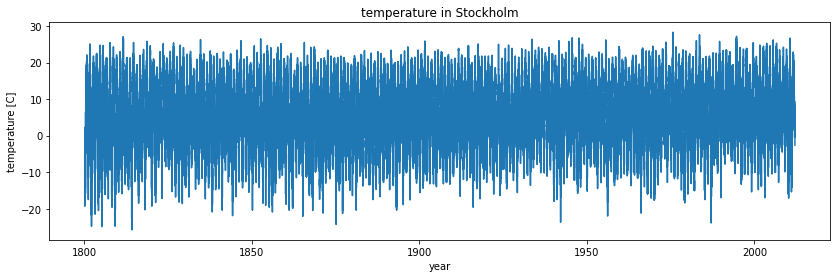

In [17]:
# a bit more extended in x-direction
plt.figure(figsize=(14,4))
plt.plot(t, data[:,3])
plt.title('temperature in Stockholm')
plt.xlabel('year')
plt.ylabel('temperature [C]');

In [19]:
#Stack arrays in sequence vertically (row wise)
#vstack((t,data[:,3])).shape
vstack((t,data[:,3])).T.shape # .T for transpose 
#savetxt('StockholmT.dat', vstack((t,data[:,3])).T)
#!tail StockholmT.dat

(77431, 2)

In [20]:
#More efficient binary storage of data to the disc
save('ST_data',data)
!ls -ltr

total 4244
drwxr-xr-x 1 root root    4096 Apr  8 13:32 sample_data
drwxr-xr-x 3 root root    4096 Apr 19 06:33 raw.githubusercontent.com
-rw-r--r-- 1 root root 4336264 Apr 19 06:38 ST_data.npy


In [21]:
data2=load('ST_data.npy')
allclose(data,data2)

True

## Manipulating data

In [26]:
#Indexing and slicing
#data[lower:upper:step, lower:upper:step]

#print(data[0])    # first row from the file
#print(data[:,0])  # years --> first column 
array(data[-3650::365,0],dtype=int) # the years with 365 spacings, and then last year

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

In [28]:
#Using mask to pick data*
#Create a mask of [True,....False....] values, and pick from the array only columns/rows where True.
# How to compute average temperature in the year of 1973?
# Create mask for the year 1973
mask = logical_and(data[:,0] >= 1973, data[:,0] < 1974)
data[mask,0];  # All should have 1973
print(mask)

[False False False ... False False False]


In [30]:
T1973 = data[mask,3] # syntax for using the mask 
print(T1973)
print('Average temperature in 1973=', sum(T1973)/len(T1973))

[ -1.2  -0.5   3.6   1.3   5.4   5.1   3.2   2.3   1.9   5.6   3.6   0.6
  -0.5   0.6   1.7   0.6   1.1   0.2  -1.2  -1.6   1.1   0.4   1.9   1.1
   2.7   3.6   1.9   0.6  -0.3  -0.3   1.4   2.    1.4   3.6   1.7   5.3
   2.2   3.    0.2  -1.3  -2.7   0.2   0.3   1.6   2.3   0.6   0.8   1.7
   0.9   1.9   3.    2.9  -0.5  -4.9  -6.4  -5.9  -5.   -3.7  -1.6   1.3
   1.7   0.4   2.4   4.5   2.1   0.7   0.6   1.    2.5   2.7   3.9   5.3
   1.9   3.1   4.9   2.    0.    2.1   5.3   4.6   6.3   8.    7.7  10.
   9.4   3.8   3.    5.9   5.8   5.4   4.5   4.7   2.    2.4   3.5   4.3
   4.    2.5   2.6   2.1   1.7   0.8   2.4   6.2   6.3   6.6   4.8   3.9
   3.1   2.7   5.2   6.9   4.3   3.1   4.    2.6   5.    6.3   4.1   6.
   6.8  10.1  10.4   8.2  10.6  10.8  11.6   8.2   9.7  10.    9.9   9.8
   9.9  10.7   8.7   7.5   4.7   7.1   6.4  10.6  12.1  13.7  13.3  13.9
  11.6  12.4  15.1  16.3  15.2  16.3  18.   15.1  15.5  16.2  16.9  14.8
  17.6  18.2  19.3  17.3  14.7  11.5  13.2  18.2  14.

In [32]:
# where tells you the index where True
indices = where(mask)
X1973 = data[indices,3]; # This gives similar data in 1973, but not identical
print(X1973)

[[ -1.2  -0.5   3.6   1.3   5.4   5.1   3.2   2.3   1.9   5.6   3.6   0.6
   -0.5   0.6   1.7   0.6   1.1   0.2  -1.2  -1.6   1.1   0.4   1.9   1.1
    2.7   3.6   1.9   0.6  -0.3  -0.3   1.4   2.    1.4   3.6   1.7   5.3
    2.2   3.    0.2  -1.3  -2.7   0.2   0.3   1.6   2.3   0.6   0.8   1.7
    0.9   1.9   3.    2.9  -0.5  -4.9  -6.4  -5.9  -5.   -3.7  -1.6   1.3
    1.7   0.4   2.4   4.5   2.1   0.7   0.6   1.    2.5   2.7   3.9   5.3
    1.9   3.1   4.9   2.    0.    2.1   5.3   4.6   6.3   8.    7.7  10.
    9.4   3.8   3.    5.9   5.8   5.4   4.5   4.7   2.    2.4   3.5   4.3
    4.    2.5   2.6   2.1   1.7   0.8   2.4   6.2   6.3   6.6   4.8   3.9
    3.1   2.7   5.2   6.9   4.3   3.1   4.    2.6   5.    6.3   4.1   6.
    6.8  10.1  10.4   8.2  10.6  10.8  11.6   8.2   9.7  10.    9.9   9.8
    9.9  10.7   8.7   7.5   4.7   7.1   6.4  10.6  12.1  13.7  13.3  13.9
   11.6  12.4  15.1  16.3  15.2  16.3  18.   15.1  15.5  16.2  16.9  14.8
   17.6  18.2  19.3  17.3  14.7  11.5  1

In [33]:
print(T1973.shape, X1973.shape)
print('Average temperature in 1973=', sum(X1973[0,:])/len(X1973[0,:]))

(365,) (1, 365)
Average temperature in 1973= 7.414794520547944


In [34]:
#What is the mean monthly temperatures for each month of the year?
Febr=data[:,1]==2
mean(data[Febr,3])

-3.212109570736596

Text(0, 0.5, 'average temperature')

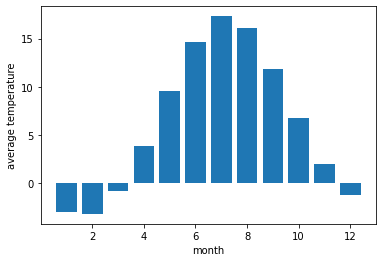

In [35]:
monthly_mean=[mean(data[data[:,1]==month,3]) for month in range(1,13)]
plt.bar(range(1,13),monthly_mean);
plt.xlabel('month')
plt.ylabel('average temperature')

## Linear algebra


In [36]:
A = random.rand(3,3) #Be careful 
print(A)
A*A  # It is not matrix-matrix product, but element-wise product

[[0.04480349 0.95485137 0.18950775]
 [0.42290382 0.93105554 0.9220108 ]
 [0.66149317 0.25260085 0.8459    ]]


array([[0.00200735, 0.91174114, 0.03591319],
       [0.17884764, 0.86686442, 0.85010391],
       [0.43757322, 0.06380719, 0.7155468 ]])

In [ ]:
#Way-1: Matrix product or matrix-vector product can be performed by dot command
dot(A,A)

array([[1.63944496, 1.2775356 , 1.79263459],
       [1.46796299, 1.35681365, 1.76370757],
       [1.24711907, 1.12792344, 1.48560786]])

In [38]:
v1 = random.rand(3)
print(v1.shape) # v1 is a 3X1 matrix 
#print( dot(A,v1) ) # matrix.vector product
print( dot(v1,v1) ) # length of vector^2 # being converted to 1X3 X 3X1 --> a number is expected 

(3,)
1.4132940730131451


In [39]:
#Way-2: Use the matrix class
M = matrix(A)
v = matrix(v1).T # create a column vector
print(v.shape)

(3, 1)


In [40]:
M*M  # this is now matrix-matrix product
M*v # this is matrix*vector product
v.T*M # vector*matrix product
v.T*v # inner-product

matrix([[1.41329407]])

### Array/Matrix transformations

- .T or  transpose(M) transposes matrix
- .H hermitian conjugate
- conjugate(M) conjugates
- real(M) and imag(M) takes real and imaginary part of the matrix

### Library linalg
More advanced linear algebra operations
- linalg.det(A)
- linalg.inv(A) or just M.I
- linalg.eig, linalg.eigvals, linalg.eigh
- linalg.svd()
- linalg.solve()
- linalg.cholesky()

In [41]:
from numpy import linalg
print( linalg.det(A) )
linalg.inv(A)

0.16916495442419358


array([[ 3.27892482, -4.4917043 ,  4.16126993],
       [ 1.49067226, -0.51700311,  0.22956438],
       [-3.00925815,  3.66689581, -2.1404892 ]])

In [42]:
M.I

matrix([[ 3.27892482, -4.4917043 ,  4.16126993],
        [ 1.49067226, -0.51700311,  0.22956438],
        [-3.00925815,  3.66689581, -2.1404892 ]])

#### Eigenvalues and eigenvectors
$ M v_n = \lambda_n v_n$ 
where $v_n$ is the n-th eigenvector with $\lambda_n$ being the corresponding eigenvalue.
- use "eigvals"
- use "eigvalsh" for symmetric/hermitian matrics 
- use the function eig (or eigh) for calculating both eigenvalues and eigenvectors

In [43]:
linalg.eig(A)

(array([1.81518651+0.j        , 0.00328626+0.30525965j,
        0.00328626-0.30525965j]),
 array([[-0.45181228+0.j        ,  0.75425007+0.j        ,
          0.75425007-0.j        ],
        [-0.73831878+0.j        ,  0.06908942+0.29562824j,
          0.06908942-0.29562824j],
        [-0.50075048+0.j        , -0.5133537 -0.27460045j,
         -0.5133537 +0.27460045j]]))

In [44]:
print(v1)
print( sum(v1) )
print( trace(A) )
print( diag(A) )
print( sum(diag(A)) )

[0.22309378 0.9196477  0.7195633 ]
1.8623047837193014
1.8217590263494583
[0.04480349 0.93105554 0.8459    ]
1.8217590263494583


## Reshaping arrays

In [47]:
A.shape
Ag = reshape(A, (9,1))  # this is not new data

In [48]:
Ag[0]=11
A        # we change A when we change Ag

array([[11.        ,  0.95485137,  0.18950775],
       [ 0.42290382,  0.93105554,  0.9220108 ],
       [ 0.66149317,  0.25260085,  0.8459    ]])

In [ ]:
Ax = A.flatten()  # flatten creates 1D array of all data, but creates a copy
Ax[0]=100         # changing a copy
print(A)

[[11.          0.82763106  0.9199961 ]
 [ 0.86639425  0.48163006  0.84788041]
 [ 0.70032507  0.48095383  0.6584225 ]]


## Vectorizing functions
Every function written in Python is very slow. However numpy type operations are fast, because they are written in fortran/C

TIP: Do not loop using python because it can be very slow. For instance, machine learning on image processing 


In [51]:
Temp = data[:,3]

Temp**2  #  this is fast, written in C

array([ 37.21, 237.16, 225.  , ...,  24.01,   0.36,   6.76])

In [52]:
array([Temp[i]**2 for i in range(len(Temp))])  # This is slow, written in Python


array([ 37.21, 237.16, 225.  , ...,  24.01,   0.36,   6.76])

In [53]:
#What if we have a function that cannot simply work on arrays?
#For example, theta function?
def Theta(x):
    if x>=0:
        return 1
    else:
        return 0

In [55]:
#We can vectorize Theta, to make it applicable to arrays.
#This is simply achieved by call to numpy function vectorize, which will create low-level routine from your function
Theta_vec = vectorize(Theta)
# This is very fast now, and creates 0 or ones
positive_temperatures=Theta_vec(Temp)
positive_temperatures

array([0, 0, 0, ..., 1, 1, 0])

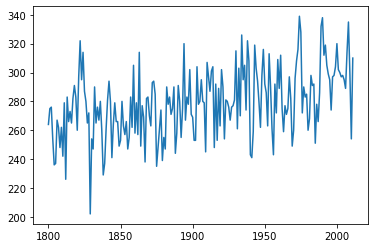

In [56]:
#How to calculate number of days in a year with positive temperatures?
# Boolean array to select data with positive temperatures
positives = array(positive_temperatures, dtype=bool)
# keeps data with positive temperatures only
kept = data[positives,0]
# now we just need to check how many of these data are in each year
years = list(range(1800,2013,1))
hist = histogram(kept, bins=years)
plt.plot(hist[1][:-1], hist[0]);


# Scipy
SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering. It is built on Numpy, and here are some of the useful packages for us:
- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fftpack)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse Eigenvalue Problems (scipy.sparse)
- Statistics (scipy.stats)
- Multi-dimensional image processing (scipy.ndimage)
- File IO (scipy.io)


## Special functions 

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special.


In [57]:
!apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  ghostscript gsfonts javascript-common libcupsfilters1 libcupsimage2 libgs9
  libgs9-common libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0
  libptexenc1 libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-did-you-mean
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | lighttpd | httpd poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming font

In [58]:
!pip install latex

  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7604 sha256=c568cd6d9d118c6bb89238d894c0faef444742766aff36809c5142a2bd3aa0aa
  Stored in directory: /root/.cache/pip/wheels/57/d6/11/5d5718227890d9e479b6137cb406410c37a0b84b2ab35b872b
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7247 sha256=adb1c237bb8d22817eba597ec706104830479890d4f9c82fffe7b8f950e92710
  Stored in directory: /root/.cache/pip/wheels/28/76/4b/7db27e02c1de4d2181559d108fcdfed1680ff7d3534553d460
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2781 sha256=8eeeea4449be13d1ae91e18d8d83b9570b8fa8ed478c96b22186d0e3354d1a09
  Stored in directory: /root/.cache/pip/wheels/4c/c0/ce/5a47f35186acbe73e38811df30daaf798c81a7599bb2d5995a
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2214 sha256=fec7b16a876ceaf0fd8d589dae0ecbdb2e764b312d89e0333214bd984059a622
  Stored in directory: /root/.cache/pip/wheels/7a/f1/d7/124b54c21a9ba4973bc60fc

In [3]:
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super-minimal all 0.3.4-11 [5,810 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super all 0.3.4-11 [18.7 MB]
Fetched 24.5 MB in 1s (22.5 MB/s)
Selecting previously unselected package cm-super-minimal.
(Reading database ... 181343 files and directories currently installed.)
Preparing to unpack .../cm-super-minimal_0.3.4-11_all.deb ...
Unpacking cm-super-minimal (0.3.4-11) ...
Selectin

### Complex spherical harmonics
As we learned in QM, the *renormalized* complex spherical harmonics is the angular wave function for spherically symmetric potentials. It reads
$$
Y_{lm}(\theta,\phi)=\epsilon\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi (l+|m|)!}}e^{im\phi}P_l^m(cos(\theta))
$$
where $\epsilon = (-1)^m$ for $m\geq 0$ or $\epsilon=1$ for $m\leq 0$. $P_l^m(x)$ denotes the [*associated Legendre polynomials*](https://en.wikipedia.org/wiki/Associated_Legendre_polynomials), which yield
\begin{equation}
P_l^m(x)=\frac{(-1)^m}{2^l l!}(1-x^2)^{m/2}\frac{d^{l+m}}{dx^{l+m}}(x^2-1)^l
\end{equation}
Note that in the complex spherical harmonics, $x\rightarrow cos(\theta)$.

> IMPORTANT: $l$ is allowed to be non-negative integers, *i.e.*, 0, 1, 2, 3..., and $m\in [-l,l]$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta =np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(el, m, cmpt='real'):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(m, el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    #if m < 0:
    #    Y = np.sqrt(2) * (-1)**m * Y.imag
    #elif m > 0:
    #    Y = np.sqrt(2) * (-1)**m * Y.real
    if (cmpt=='real'):
        Yx, Yy, Yz = np.abs(Y.real) * xyz
    else:
        Yx, Yy, Yz = np.abs(Y.imag) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('cool'))
    cmap.set_clim(-0.5, 0.5)

    ax = fig.add_subplot(projection='3d')
    if (cmpt=='real'):
        ax.plot_surface(Yx, Yy, Yz, facecolors=cmap.to_rgba(Y.real), rstride=2, cstride=2)
    else:
        ax.plot_surface(Yx, Yy, Yz, facecolors=cmap.to_rgba(Y.imag), rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}-{}$'.format(el, m, cmpt))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('on')

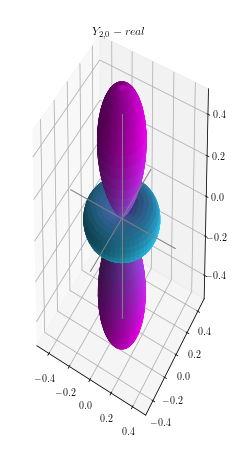

In [7]:
fig = plt.figure(figsize=plt.figaspect(2.))
# As an example, the imaginary part of Y_2,-1 is plotted
l, m = 2, 0
# real/imag -- for real/imaginary parts
cmpt='real'

plot_Y(l,m,cmpt)
plt.savefig('Y{}_{}-{}.png'.format(l, m, cmpt))
plt.show()

## Interpolation

Interpolation is simple and convenient in scipy: The interp1d function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

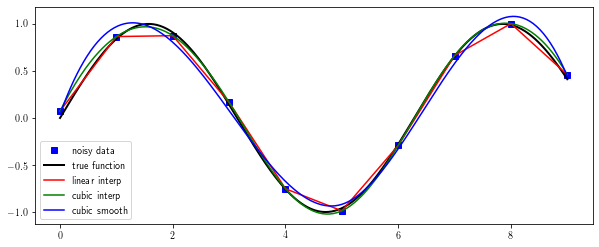

In [11]:
from scipy.interpolate import *
from numpy import random
from numpy import linspace
from numpy import sin
%matplotlib inline
#import matplotlib 
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
#from IPython.display import Image

def f(x):
    return sin(x)

n = linspace(0, 9, 10)  # Return evenly spaced numbers over a specified interval.
x = linspace(0, 9, 300)

y_meas = f(n) + 0.05 * random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas, kind='linear')
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

cubic_smooth = UnivariateSpline(n, y_meas, s=0.05)
y_interp3 = cubic_smooth(x)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.plot(x, y_interp3, 'b', label='cubic smooth')
ax.legend(loc=3);

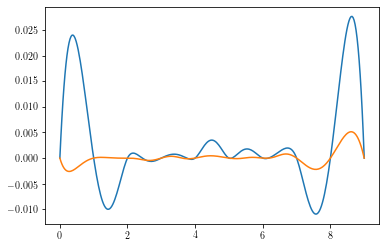

In [12]:
cubic_interpolation = interp1d(n, f(n), kind='cubic')
diff = cubic_interpolation(x)-f(x)

cubic_smooth = UnivariateSpline(n, f(n), s=0.0, k=4)
diff2 = cubic_smooth(x)-f(x)

plt.plot(x, diff)
plt.plot(x, diff2)

# Summary 

- Use numpy for medium-performance programming <br />--> combining Python with Fortran/C, <br /> e.g., https://metaphor.ethz.ch/fsdb/sam/PythonTutorial/combining.html
- Use scipy for scientific computations <br />--> computational physics in Python, <br />e.g., http://www-personal.umich.edu/~mejn/computational-physics/